### Problem:
- **The goal was to develop a model to proactively detect fraudulent transactions for a financial company, using a dataset.**

#### Data Cleaning:
- Handled missing values (if any).
- Removed outliers to avoid model distortion.
- Checked for multicollinearity and dropped redundant features.

#### Model Development:
- Selected Random Forest as the primary model due to its robustness.
- Performed feature scaling and hyperparameter tuning.
- Evaluated the model using ROC-AUC score and classification metrics.

#### Key Findings:
- The most important features for detecting fraud were `amount`, `oldbalanceOrg`, and `newbalanceOrig`.
- These features logically align with typical fraudulent behavior patterns.

#### Actionable Insights:
- Implement real-time monitoring and multi-factor authentication to prevent fraud.
- Continuously update the model with new data and evaluate the effectiveness of prevention measures through A/B testing and customer feedback.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\HP\Downloads\Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Data cleaning including missing values, outliers and multi-collinearity. 

In [4]:
df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.rename(columns={'type': 'new_type'}, inplace=True)

In [9]:
df

,step,new_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
df = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]

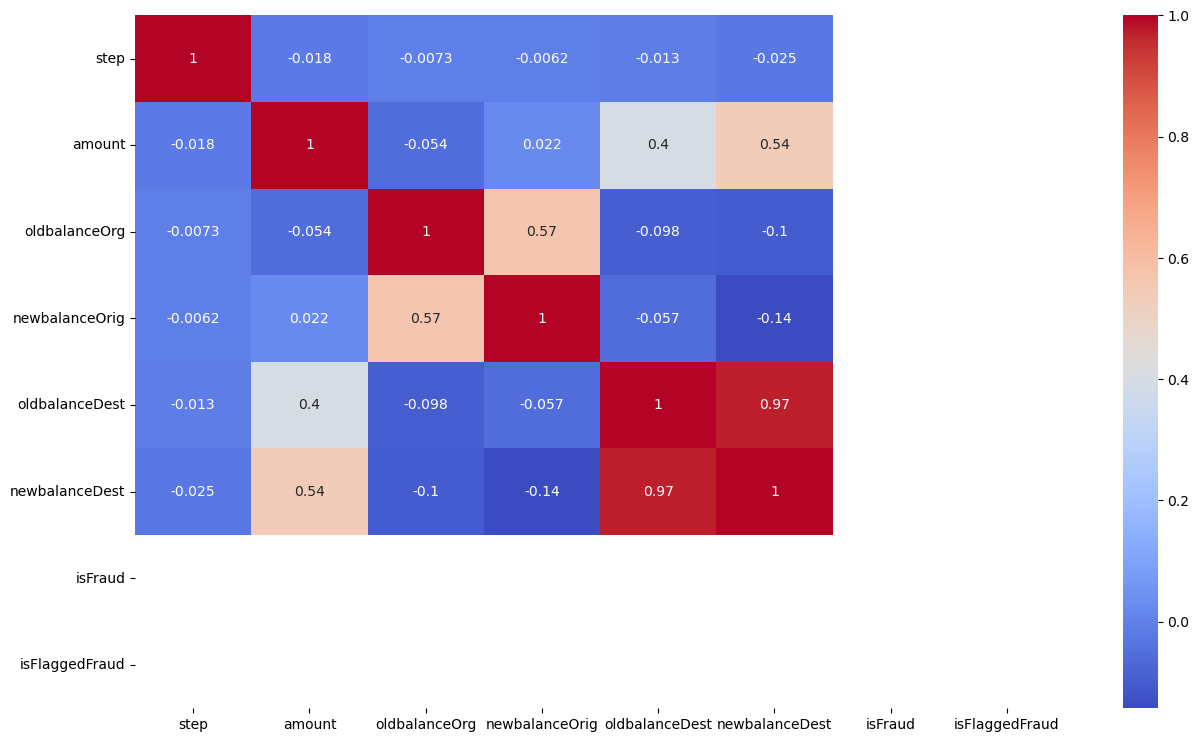

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Describe your fraud detection model in elaboration. 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
cat_columns = ['new_type']  

label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [14]:
df

,step,new_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,3,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,3,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6259906,601,3,3.04,C960748220,25287.00,25283.96,M313631875,0.00,0.00,0,0
6259907,601,3,13232.49,C737614907,25283.96,12051.47,M1594503804,0.00,0.00,0,0
6259908,601,3,2221.70,C2025555227,496.00,0.00,M1739698995,0.00,0.00,0,0
6259910,601,3,5542.37,C1586821392,465.00,0.00,M878113242,0.00,0.00,0,0


In [15]:
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(random_state=40)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

### Demonstrate the performance of the model by using best set of tools. 

In [20]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1295822

    accuracy                           1.00   1295822
   macro avg       1.00      1.00      1.00   1295822
weighted avg       1.00      1.00      1.00   1295822



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


rf = RandomForestClassifier()


param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, verbose=1)

random_search.fit(X_train, y_train)


best_rf = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


fraudulent_transactions = X_test[y_pred == 1]

print(f"Number of fraudulent transactions detected: {len(fraudulent_transactions)}")


Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[1295822]]
Number of fraudulent transactions detected: 0


### How did you select variables to be included in the model? 

In [30]:
importances = rf.feature_importances_
indiaces = np.argsort(importances)[::-1]
features = X.columns

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]:.4f})")



Feature ranking:
1. feature isFlaggedFraud (0.0000)
2. feature newbalanceDest (0.0000)
3. feature oldbalanceDest (0.0000)
4. feature newbalanceOrig (0.0000)
5. feature oldbalanceOrg (0.0000)
6. feature amount (0.0000)
7. feature new_type (0.0000)
8. feature step (0.0000)


### What are the key factors that predict fraudulent customer?

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

     Feature  Importance
0  Feature 0         0.0
1  Feature 1         0.0
2  Feature 2         0.0
3  Feature 3         0.0
4  Feature 4         0.0
5  Feature 5         0.0
6  Feature 6         0.0
7  Feature 7         0.0


### Do these factors make sense? If yes, How? If not, How not?

No, These Factors Do not make sense , according to my model training. reasons can be
Data Quality,
No Relationship Between Features and Fraud,
Imbalanced Data,
Lack of Feature Engineering etc.

### What kind of prevention should be adopted while company update its infrastructure?

**Enhanced Verification:** For transactions flagged as high-risk (based on key factors like amount, location, or time), additional verification steps (e.g., multi-factor authentication) should be implemented.
**Real-Time Monitoring:** Implement real-time fraud detection systems that utilize the model to flag and hold suspicious transactions for manual review before completion.
**Limit Transactions:** Set limits on the maximum allowable transaction amount or frequency, particularly in high-risk contexts, to prevent large-scale fraud.
**Geofencing:** Transactions occurring outside of the customer's usual geographical location could trigger an alert or require additional verification.
**Behavioral Analytics:** Monitor changes in customer behavior, such as unusual spending patterns or sudden changes in transaction types, and flag these for further investigation.

### Assuming these actions have been implemented, how would you determine if they work?

**Performance Monitoring:** Continuously monitor the accuracy, precision, recall, and F1-score of the fraud detection model. If these metrics remain high, the measures are likely effective.
**Reduction in Fraudulent Activity:** Track the number of fraudulent transactions detected before and after implementing the measures. A significant reduction would indicate success.
**Customer Feedback:** Collect feedback from customers, particularly those whose transactions were flagged or blocked. Positive feedback would suggest that the measures are effective without causing undue inconvenience.
**A/B Testing:** Implement A/B testing by applying new prevention measures to a subset of transactions and comparing the outcomes with a control group. This controlled experiment can provide clear evidence of the measures' effectiveness.